# DeepRacer Log Analysis

A lot of this comes from following [this github post](https://github.com/breadcentric/aws-deepracer-workshops/blob/enhance-log-analysis/log-analysis/Evaluation_analysis.ipynb)

It requires the files from the github:
- track_utils.py
- log_analysis.py
- cw_utils.py

The tracks can be downloaded from the [AWS Workshops Github](https://github.com/aws-samples/aws-deepracer-workshops/tree/master/log-analysis/tracks)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

#Shapely Library
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString

import sys
sys.path.append('/sas/sasdata/users/ld07716/Projects/DeepRacer')
import track_utils as tu
import log_analysis as la
import cw_utils as cw

projectDir = '/sas/sasdata/users/ld07716/Projects/DeepRacer/'

# Make sure your boto version is >= '1.9.133'
cw.boto3.__version__

'1.16.61'

## Load the Track

Loaded 71 waypoints


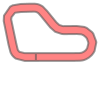

In [2]:
# load track and assign border variables
l_center_line, l_inner_border, l_outer_border, road_poly = tu.load_track(f'reinvent_base', absolute_path=projectDir)
road_poly

## Evaluation Analysis

#### Downloading Log Files
The files will download in a .tar format. 
- Download the file
- extract the file with: tar -xvf [file name]
- The log files will be in their respective training/evaluation folders

In [6]:
# Print the log file name
log_files = !ls Joe-RightDirection4/logs/evaluation
log_files

['evaluation-20210128113942-A96F_25iR0uzBMmD2Qn8zg-robomaker.log']

In [7]:
# Log file
log_filename = log_files[0]
evaluation_log = f'{projectDir}/Joe-RightDirection4/logs/evaluation/{log_filename}'

# load into pandas df
eval_df = la.load_eval_data(evaluation_log)

In [8]:
# View the dataframe
eval_df.head()

,iteration,episode,steps,x,y,yaw,steer,throttle,action,reward,done,on_track,progress,closest_waypoint,track_len,timestamp
0,1,0,3,270.78,106.18,0.0181,-30.0,1.00,2.0,1.0,0,True,0.8812,1,16.64,1611833828.9939578
1,1,0,4,272.48,105.98,-0.4742,-30.0,1.00,2.0,1.0,0,True,0.9830,1,16.64,1611833829.063875
2,1,0,5,276.25,105.38,-1.8408,0.0,0.33,3.0,1.0,0,True,1.2100,1,16.64,1611833829.13115
3,1,0,6,280.21,104.64,-3.3064,30.0,1.00,8.0,1.0,0,True,1.4480,2,16.64,1611833829.195326
4,1,0,7,284.44,104.11,-4.0481,0.0,0.67,4.0,1.0,0,True,1.7023,2,16.64,1611833829.2636738


In [9]:
eval_df.tail()

,iteration,episode,steps,x,y,yaw,steer,throttle,action,reward,done,on_track,progress,closest_waypoint,track_len,timestamp
929,1,2,313,237.48,131.02,-31.5792,30.0,0.67,7.0,0.5,0,True,98.8795,110,16.64,1611833892.9110088
930,1,2,314,243.06,129.70,-27.4034,30.0,0.67,7.0,0.5,0,True,99.2154,110,16.64,1611833892.9778068
931,1,2,315,247.81,128.98,-23.7648,0.0,1.00,5.0,0.5,0,True,99.5007,110,16.64,1611833893.0415504
932,1,2,316,252.59,128.57,-20.2083,0.0,1.00,5.0,0.5,0,True,99.7883,111,16.64,1611833893.1088672
933,1,2,317,258.83,127.94,-16.7083,0.0,0.33,3.0,0.5,1,True,100.0000,0,16.64,1611833893.1758766


## View the path of the DeepRacer Car

/sas/sasdata/users/ld07716/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/sas/sasdata/users/ld07716/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


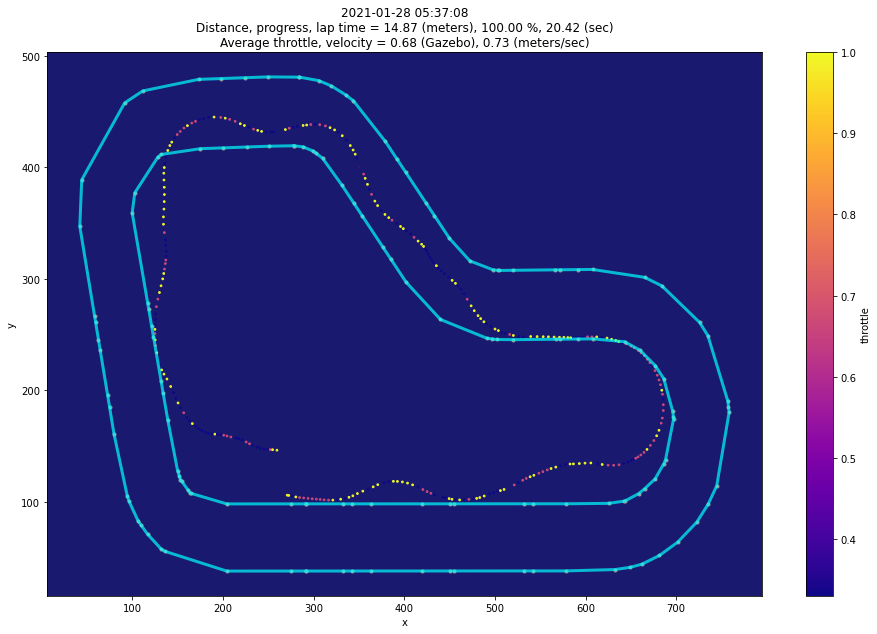

/sas/sasdata/users/ld07716/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/sas/sasdata/users/ld07716/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<Figure size 432x288 with 0 Axes>

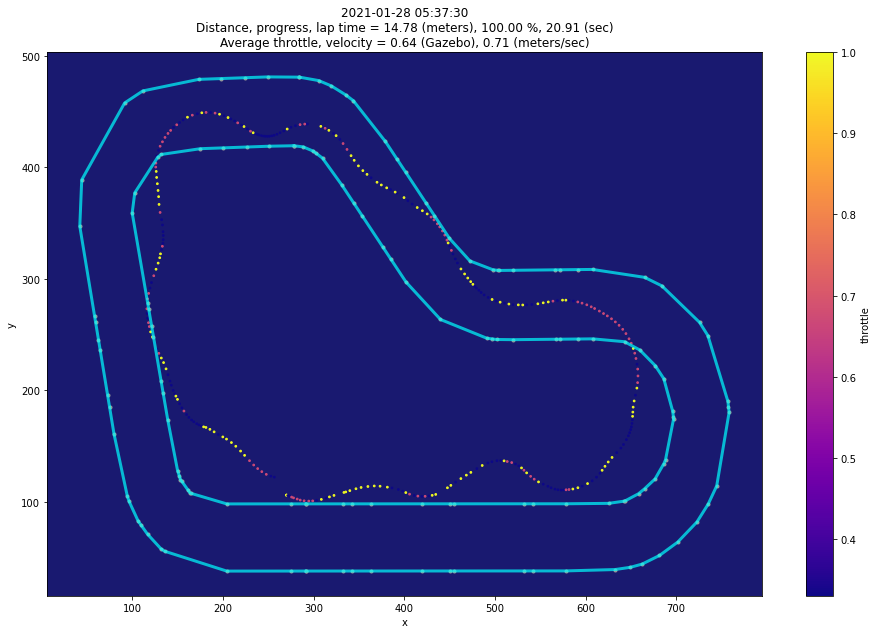

/sas/sasdata/users/ld07716/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/sas/sasdata/users/ld07716/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<Figure size 432x288 with 0 Axes>

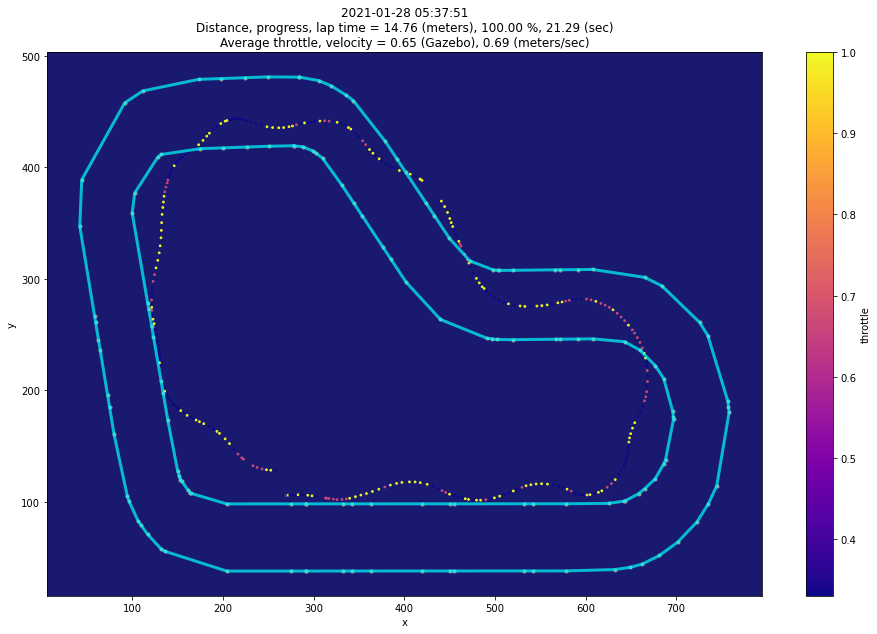

<Figure size 432x288 with 0 Axes>

In [55]:
joe_print_eval = la.analyse_single_evaluation(evaluation_log, l_inner_border, l_outer_border, episodes=3)
joe_print_eval